In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
import matplotlib.pyplot as plt
import numpy as np

### Load CIFAR-10

In [3]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [36]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# train data
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

# test data -- for later
# testset = torchvision.datasets.CIFAR10(root='./data', train=False,
#                                        download=True, transform=transform)
# testloader = torch.utils.data.DataLoader(testset, batch_size=4,
#                                          shuffle=False, num_workers=2)


Files already downloaded and verified


In [37]:
def show_images(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

In [38]:
vars(trainloader)

{'_DataLoader__initialized': True,
 'batch_sampler': <torch.utils.data.sampler.BatchSampler at 0x10deeb8d0>,
 'batch_size': 4,
 'collate_fn': <function torch.utils.data.dataloader.default_collate>,
 'dataset': Dataset CIFAR10
     Number of datapoints: 50000
     Split: train
     Root Location: ./data
     Transforms (if any): Compose(
                              ToTensor()
                              Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
                          )
     Target Transforms (if any): None,
 'drop_last': False,
 'num_workers': 2,
 'pin_memory': False,
 'sampler': <torch.utils.data.sampler.RandomSampler at 0x10deeb1d0>,
 'timeout': 0,
 'worker_init_fn': None}

  dog plane   cat truck


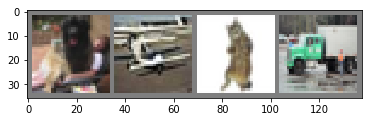

In [39]:
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
show_images(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

### splicing images

In [8]:
images.shape

torch.Size([4, 3, 32, 32])

In [9]:
def splice_images(img_batch, piece_size):
    assert len(img_batch.shape) == 4,"Provide batches of inputs"
    assert not img_batch.shape[2] % piece_size and not img_batch.shape[3] % piece_size
    

In [14]:
transforms.FiveCrop??

# Test

In [19]:
import numpy as np
import torch

In [25]:
a = np.arange(36*3).reshape(6,-1,3)

In [26]:
a

array([[[  0,   1,   2],
        [  3,   4,   5],
        [  6,   7,   8],
        [  9,  10,  11],
        [ 12,  13,  14],
        [ 15,  16,  17]],

       [[ 18,  19,  20],
        [ 21,  22,  23],
        [ 24,  25,  26],
        [ 27,  28,  29],
        [ 30,  31,  32],
        [ 33,  34,  35]],

       [[ 36,  37,  38],
        [ 39,  40,  41],
        [ 42,  43,  44],
        [ 45,  46,  47],
        [ 48,  49,  50],
        [ 51,  52,  53]],

       [[ 54,  55,  56],
        [ 57,  58,  59],
        [ 60,  61,  62],
        [ 63,  64,  65],
        [ 66,  67,  68],
        [ 69,  70,  71]],

       [[ 72,  73,  74],
        [ 75,  76,  77],
        [ 78,  79,  80],
        [ 81,  82,  83],
        [ 84,  85,  86],
        [ 87,  88,  89]],

       [[ 90,  91,  92],
        [ 93,  94,  95],
        [ 96,  97,  98],
        [ 99, 100, 101],
        [102, 103, 104],
        [105, 106, 107]]])

In [27]:
a.shape

(6, 6, 3)

In [28]:
shape = (2,3)

In [35]:
# b = a.reshape(a.shape[0]//shape[0],shape[0],-1)
x,y = a.shape[0]//shape[0], a.shape[1]//shape[1]
b = a.reshape(x,shape[0],y,shape[1],-1).swapaxes(1,2).reshape(x*y,shape[0],shape[1],-1)
b

array([[[[  0,   1,   2],
         [  3,   4,   5],
         [  6,   7,   8]],

        [[ 18,  19,  20],
         [ 21,  22,  23],
         [ 24,  25,  26]]],


       [[[  9,  10,  11],
         [ 12,  13,  14],
         [ 15,  16,  17]],

        [[ 27,  28,  29],
         [ 30,  31,  32],
         [ 33,  34,  35]]],


       [[[ 36,  37,  38],
         [ 39,  40,  41],
         [ 42,  43,  44]],

        [[ 54,  55,  56],
         [ 57,  58,  59],
         [ 60,  61,  62]]],


       [[[ 45,  46,  47],
         [ 48,  49,  50],
         [ 51,  52,  53]],

        [[ 63,  64,  65],
         [ 66,  67,  68],
         [ 69,  70,  71]]],


       [[[ 72,  73,  74],
         [ 75,  76,  77],
         [ 78,  79,  80]],

        [[ 90,  91,  92],
         [ 93,  94,  95],
         [ 96,  97,  98]]],


       [[[ 81,  82,  83],
         [ 84,  85,  86],
         [ 87,  88,  89]],

        [[ 99, 100, 101],
         [102, 103, 104],
         [105, 106, 107]]]])

# Test on image

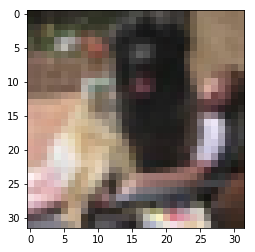

In [75]:
show_images(images[0])

In [88]:
images[0].transpose(0,2).shape

torch.Size([32, 32, 3])

In [89]:
def cut_img(img, shape = (4,4)):
    a = img.transpose(0, 1).transpose(1,2)
    x,y = a.shape[0]//shape[0], a.shape[1]//shape[1]
    b = a.reshape(x,shape[0],y,shape[1],-1).transpose(1,2)
    b = b.reshape(x*y,shape[0],shape[1],-1)
    #transpose to torch accepted standard
    b = b.transpose(2,3).transpose(1,2)
    return b

In [90]:
t = cut_img(images[0], (8,8))

In [91]:
t.shape

torch.Size([16, 3, 8, 8])

In [92]:
images[0].shape

torch.Size([3, 32, 32])

In [93]:
t.shape

torch.Size([16, 3, 8, 8])

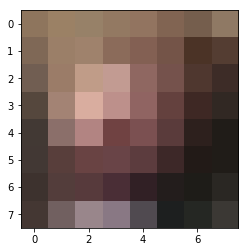

In [94]:
show_images(t[7])

# cut images

In [109]:
def cut_torch_imgs(imgs, shape = (4,4)):
    # imgs is a batch of images -- expected n*c*h*w
    # shape is the shape of each piece
    # returns n*pieces*c*h*w
    assert len(imgs.shape) == 4,"Provide batches of inputs"
    assert not imgs.shape[2] % shape[0], "undivisible height for piece size"
    assert not imgs.shape[3] % shape[1], "undivisible width for piece size"
    
    a = imgs.transpose(1, 2).transpose(2,3)
    c = a[0].shape[-1]
    x,y = a[0].shape[0]//shape[0], a[0].shape[1]//shape[1]
    b = a.reshape(-1,x,shape[0],y,shape[1],c).transpose(2,3)
    b = b.reshape(-1,x*y,shape[0],shape[1],c)
    #transpose to torch accepted standard
    b = b.transpose(3,4).transpose(2,3)
    return b

In [110]:
s = cut_torch_imgs(images[0:4], (8,8))

In [111]:
images[0:1].shape, s.shape

(torch.Size([1, 3, 32, 32]), torch.Size([4, 16, 3, 8, 8]))

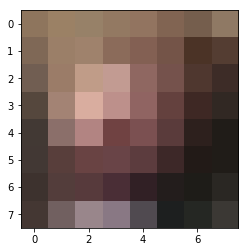

In [112]:
show_images(s[0][7])